In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import decoupler as dc
# import scrublet as scr
# import muon as mu
#from vpolo.alevin import parser # to parse alevin output
import matplotlib.pyplot as plt
import seaborn as sns

import scvi
import torch

from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import statsmodels.stats.multitest as multi
from adjustText import adjust_text
import re

seed = 0
np.random.seed(seed)
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [21]:
df = pd.read_csv('/home/yy693/pi_hafler/ASAP/data/ASAPFinalClinicalData_20041002_2000029032KooMainPro-ASAPINearf.delspace_recovermis.csv')

In [22]:
list(df.columns)

['RecordID',
 'Visit',
 'SubjectID',
 'DateICFSigned',
 'YearICFSigned',
 'EnrollmentCategory',
 'RBDY/N?',
 'YearofRBDDx',
 'RBDAAO',
 'AgeRBDDx',
 'RBDDxtoConesnt',
 'PDY/N',
 'Year1stPDSx',
 'YearofPDDx',
 'PDAAO',
 'AgePDDx',
 'PDDxtoConsent',
 'DLBY/N',
 'Year1stDLBSx',
 'YearDLBDX',
 'DLBAAO',
 'AgeDLBDx',
 'DLBDxtoConsent',
 'PSGinEpic?',
 'BirthYear',
 'MeetsMDSPDCriteria?',
 'PSGDate',
 'Age',
 'Gender',
 'Ethnicity',
 'Race',
 'RaceOther',
 'PDFamilyHx',
 'PDFHMother',
 'PDFHFather',
 'PDFHFullSibs',
 'PDFHHalfSibs',
 'PDFHMaternalGPs',
 'PDFHPaternalGPs',
 'PDFHMaternalAuntsorUncles',
 'PDFHChildren',
 'PDFHOther',
 'DLBFamilyHx',
 'DLBFHMother',
 'DLBFHFather',
 'DLBFHFullSibs',
 'DLBFHHalfSibs',
 'DLBFHMaternalGPs',
 'DLBFHPaternalGPs',
 'DLBFHMaternalAuntsorUncles',
 'DLBFHChildren',
 'DLBFHOther',
 'MSAFamilyHx',
 'MSAFHMother',
 'MSAFHFather',
 'MSAFHFullSibs',
 'MSAFHHalfSibs',
 'MSAFHMaternalGPs',
 'MSAFHPaternalGPs',
 'MSAFHMaternalAuntsorUncles',
 'MSAFHChildren',
 

In [23]:
df

,RecordID,Visit,SubjectID,DateICFSigned,YearICFSigned,EnrollmentCategory,RBDY/N?,YearofRBDDx,RBDAAO,AgeRBDDx,...,LeftCaudateSBR,MeanStriatumSBR.1,MeanStriatumSBRPercentile,CaudatePutamenRatio,AssymetryIndex.1,PhenoconverteasofSept2024r?,CSFTNFalpha,CSFTNFBeta,PlasmaTNFalpha,PlasmaTNFBeta
0,1,screening__baselin_arm_1,YPD001,5/10/21,2021,HC,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.32,0.03,NaN,NaN
1,2,screening__baselin_arm_1,YPD002,5/14/21,2021,HC,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.39,0.15,NaN,NaN
2,3,screening__baselin_arm_1,YPD003,6/17/21,2021,RBD,Yes,2015.0,45.0,52.0,...,3.199201,2.106979,80.338111,2.903936,18.971654,0.0,1.51,0.00,NaN,NaN
3,4,screening__baselin_arm_1,YPD004,6/22/21,2021,RBD,Yes,2020.0,67.0,68.0,...,2.416286,1.784760,72.757644,2.641239,1.600081,0.0,1.25,0.00,NaN,NaN
4,5,screening__baselin_arm_1,YPD005,7/20/21,2021,RBD,Yes,NaN,NaN,NaN,...,2.924498,1.831785,70.258175,3.360739,10.943204,0.0,0.99,0.03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,93,screening__baselin_arm_1,YPD093,2/7/24,2024,RBD,Yes,2018.0,65.0,66.0,...,2.413548,1.826967,75.426548,2.742129,13.543002,0.0,NaN,NaN,NaN,NaN
80,94,screening__baselin_arm_1,YPD094,2/12/24,2024,RBD,Yes,2024.0,NaN,74.0,...,3.346941,2.389847,100.586172,3.040916,9.149194,0.0,NaN,NaN,NaN,NaN
81,95,screening__baselin_arm_1,YPD095,3/28/24,2024,PD,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,96,screening__baselin_arm_1,YPD096,5/9/24,2024,RBD,Yes,2023.0,NaN,68.0,...,3.036996,2.214016,90.256746,2.855411,28.688184,0.0,NaN,NaN,NaN,NaN


In [24]:
df['Category'] = df['EnrollmentCategory'].replace({'PD-RBD': 'PD'})

In [25]:
df.sort_values(by='CSFCells/uL', ascending=False)[['CSFCells/uL', 'SubjectID']].head(10)

,CSFCells/uL,SubjectID
15,35.0,YPD016
22,32.5,YPD023
34,25.0,YPD036
35,10.0,YPD038
12,7.8,YPD013
30,7.7,YPD031
18,7.3,YPD019
7,5.9,YPD008
2,5.7,YPD003
17,5.6,YPD018


In [26]:
blacklist = ['YPD016', 'YPD023', 'YPD036']
df = df[~df['SubjectID'].isin(blacklist)]

/tmp/ipykernel_3406747/3366613698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='CSFCells/uL',showfliers=False, order=['HC', 'RBD', 'PD'],


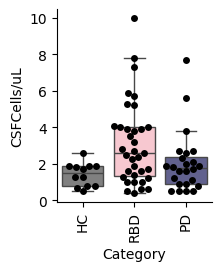

In [27]:
plt.figure(figsize=(2,2.5))
sns.swarmplot(data=df, x='Category', y='CSFCells/uL',order=['HC', 'RBD', 'PD'], size=5, color='black')
sns.boxplot(data=df, x='Category', y='CSFCells/uL',showfliers=False, order=['HC', 'RBD', 'PD'], 
    palette=["gray", "pink", "#595996"])
plt.xticks(rotation=90)
sns.despine()
plt.savefig(f'../scanpy/250407_CSF_downstream/graph/CSFCellfreq.pdf', bbox_inches='tight')

In [28]:
df

,RecordID,Visit,SubjectID,DateICFSigned,YearICFSigned,EnrollmentCategory,RBDY/N?,YearofRBDDx,RBDAAO,AgeRBDDx,...,MeanStriatumSBR.1,MeanStriatumSBRPercentile,CaudatePutamenRatio,AssymetryIndex.1,PhenoconverteasofSept2024r?,CSFTNFalpha,CSFTNFBeta,PlasmaTNFalpha,PlasmaTNFBeta,Category
0,1,screening__baselin_arm_1,YPD001,5/10/21,2021,HC,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.32,0.03,NaN,NaN,HC
1,2,screening__baselin_arm_1,YPD002,5/14/21,2021,HC,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.39,0.15,NaN,NaN,HC
2,3,screening__baselin_arm_1,YPD003,6/17/21,2021,RBD,Yes,2015.0,45.0,52.0,...,2.106979,80.338111,2.903936,18.971654,0.0,1.51,0.00,NaN,NaN,RBD
3,4,screening__baselin_arm_1,YPD004,6/22/21,2021,RBD,Yes,2020.0,67.0,68.0,...,1.784760,72.757644,2.641239,1.600081,0.0,1.25,0.00,NaN,NaN,RBD
4,5,screening__baselin_arm_1,YPD005,7/20/21,2021,RBD,Yes,NaN,NaN,NaN,...,1.831785,70.258175,3.360739,10.943204,0.0,0.99,0.03,NaN,NaN,RBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,93,screening__baselin_arm_1,YPD093,2/7/24,2024,RBD,Yes,2018.0,65.0,66.0,...,1.826967,75.426548,2.742129,13.543002,0.0,NaN,NaN,NaN,NaN,RBD
80,94,screening__baselin_arm_1,YPD094,2/12/24,2024,RBD,Yes,2024.0,NaN,74.0,...,2.389847,100.586172,3.040916,9.149194,0.0,NaN,NaN,NaN,NaN,RBD
81,95,screening__baselin_arm_1,YPD095,3/28/24,2024,PD,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PD
82,96,screening__baselin_arm_1,YPD096,5/9/24,2024,RBD,Yes,2023.0,NaN,68.0,...,2.214016,90.256746,2.855411,28.688184,0.0,NaN,NaN,NaN,NaN,RBD


In [29]:
df_meta = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/250407_BLD_downstream/metadata.csv')

In [30]:
df_meta

,DonorID,Age,Gender,EnrollmentCategory,PD_Probability,Biomarkers_Positive
0,YPD001,79.0,Male,HC,HC,HC
1,YPD002,59.0,Male,HC,HC,HC
2,YPD003,58.0,Male,RBD,RBD-LowIntm,RBD-0.0
3,YPD006,70.0,Male,RBD,RBD-High,RBD-2.0
4,YPD007,66.0,Female,HC,HC,HC
...,...,...,...,...,...,...
68,YPD092,66.0,Male,RBD,RBD-High,RBD-2.0
69,YPD093,71.0,Male,RBD,RBD-High,RBD-2.0
70,YPD095,76.0,Male,PD,PD,PD
71,YPD096,69.0,Male,RBD,RBD-High,RBD-2.0


In [31]:
df = pd.merge(df, df_meta, how='left', left_on='SubjectID', right_on='DonorID')

/tmp/ipykernel_907288/2056944937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PD_Probability', y='CSFCells/uL',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'],
/tmp/ipykernel_907288/2056944937.py:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(data=df, x='PD_Probability', y='CSFCells/uL',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'],
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


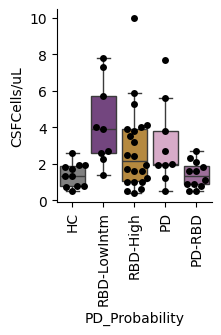

In [54]:
plt.figure(figsize=(2,2.5))
sns.swarmplot(data=df, x='PD_Probability', y='CSFCells/uL',order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'], size=5, color='black')
sns.boxplot(data=df, x='PD_Probability', y='CSFCells/uL',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'], 
    palette=["gray", "#793C89", "#C98E2B", "#DEA4CA", "#A567A1", "#595996"])
plt.xticks(rotation=90)
sns.despine()
plt.savefig(f'../scanpy/250407_CSF_downstream/graph/CSFCellfreq_PDprob.pdf', bbox_inches='tight')

In [85]:
pvals = []
for cat in ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']:
    pvals.append(mannwhitneyu(
    list(df.loc[(df['PD_Probability'] == 'HC'), 'CSFCells/uL'].dropna().values), 
    list(df.loc[(df['PD_Probability'] == cat), 'CSFCells/uL'].dropna().values)
    ).pvalue)

df_pvals = pd.DataFrame({'pvals': pvals, 'cat': ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']})
df_pvals['pvals_adj'] = multi.multipletests(df_pvals['pvals'], method='fdr_bh')[1]
df_pvals

,pvals,cat,pvals_adj
0,0.001222,RBD-LowIntm,0.004887
1,0.104201,RBD-High,0.138935
2,0.043051,PD,0.086102
3,1.000000,PD-RBD,1.000000


In [8]:
df_num = pd.read_csv('/home/yy693/pi_hafler/ASAP/scanpy/241027_CSF_integrate/cellnumber.csv', index_col=0)

In [9]:
df_num

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,NK CD56,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast
DonorID,,,,,,,,,,,,,,,,,,,,
YPD001,0,6,0,82,361,92,25,303,0,0,32,53,0,127,1,9,1,36,9,3
YPD002,0,4,0,83,1190,177,26,626,3,0,24,64,0,176,0,4,2,103,10,0
YPD003,4,130,2,659,5676,775,263,1227,1,5,164,57,0,143,2,10,7,96,6,0
YPD004,0,1,0,71,678,137,48,180,3,0,68,33,0,137,0,15,8,23,4,0
YPD005,0,10,0,312,1856,416,82,851,4,0,116,314,0,1966,4,35,20,236,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPD092,0,0,0,42,873,235,33,537,6,0,66,76,0,399,1,1,6,123,6,0
YPD093,0,14,0,113,1427,123,31,684,3,0,48,142,0,624,1,13,6,115,6,1
YPD094,0,0,0,0,9,2,1,3,0,0,0,1,0,24,2,0,0,7,0,0


In [32]:
df.set_index('SubjectID', inplace=True)

In [33]:
df = pd.merge(df, df_num, left_index=True, right_index=True, how='inner', suffixes=('', '_num'))

In [34]:
df['CSFCells/uL']

YPD001    1.3
YPD002    1.8
YPD003    5.7
YPD004    1.6
YPD005    2.7
         ... 
YPD092    0.6
YPD093    0.5
YPD094    1.6
YPD096    1.2
YPD097    1.7
Name: CSFCells/uL, Length: 66, dtype: float64

In [35]:
df_freq = (df[df_num.columns].T / df[df_num.columns].sum(axis=1)).T
df_abs = (df_freq.T * df['CSFCells/uL']).T

In [36]:
df_abs

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,NK CD56,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast
YPD001,0.000000,0.006842,0.000000,0.093509,0.411667,0.104912,0.028509,0.345526,0.000000,0.000000,0.036491,0.060439,0.000000,0.144825,0.001140,0.010263,0.001140,0.041053,0.010263,0.003421
YPD002,0.000000,0.002889,0.000000,0.059952,0.859551,0.127849,0.018780,0.452167,0.002167,0.000000,0.017335,0.046228,0.000000,0.127127,0.000000,0.002889,0.001445,0.074398,0.007223,0.000000
YPD003,0.002471,0.080308,0.001236,0.407099,3.506362,0.478758,0.162469,0.757982,0.000618,0.003089,0.101311,0.035212,0.000000,0.088339,0.001236,0.006178,0.004324,0.059304,0.003707,0.000000
YPD004,0.000000,0.001138,0.000000,0.080797,0.771550,0.155903,0.054623,0.204836,0.003414,0.000000,0.077383,0.037553,0.000000,0.155903,0.000000,0.017070,0.009104,0.026174,0.004552,0.000000
YPD005,0.000000,0.004323,0.000000,0.134870,0.802305,0.179827,0.035447,0.367867,0.001729,0.000000,0.050144,0.135735,0.000000,0.849856,0.001729,0.015130,0.008646,0.102017,0.010375,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPD092,0.000000,0.000000,0.000000,0.010483,0.217887,0.058652,0.008236,0.134027,0.001498,0.000000,0.016473,0.018968,0.000000,0.099584,0.000250,0.000250,0.001498,0.030699,0.001498,0.000000
YPD093,0.000000,0.002089,0.000000,0.016861,0.212922,0.018353,0.004625,0.102059,0.000448,0.000000,0.007162,0.021188,0.000000,0.093107,0.000149,0.001940,0.000895,0.017159,0.000895,0.000149
YPD094,0.000000,0.000000,0.000000,0.000000,0.293878,0.065306,0.032653,0.097959,0.000000,0.000000,0.000000,0.032653,0.000000,0.783673,0.065306,0.000000,0.000000,0.228571,0.000000,0.000000
YPD096,0.000433,0.008231,0.000000,0.011047,0.112419,0.035957,0.005632,0.096606,0.000217,0.000000,0.005632,0.229819,0.000217,0.474368,0.000433,0.004332,0.002166,0.196895,0.015596,0.000000


In [37]:
df[['Category']]

,Category
YPD001,HC
YPD002,HC
YPD003,RBD
YPD004,RBD
YPD005,RBD
...,...
YPD092,RBD
YPD093,RBD
YPD094,RBD
YPD096,RBD


In [38]:
df_abs = pd.merge(df_abs, df[['Category']], left_index=True, right_index=True)
df_abs_tidy = df_abs.melt(id_vars=['Category'], var_name='CellType', value_name='CellNumber')

/tmp/ipykernel_3406747/1432643375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Category', y='CellNumber',showfliers=False, order=['HC', 'RBD', 'PD'],


Text(0.5, 1.0, 'CSF Mac')

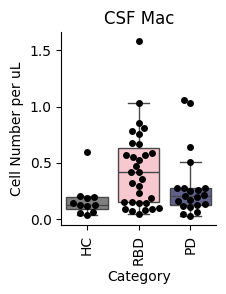

In [39]:
celltype = 'CSF Mac'

df_plot = df_abs_tidy[df_abs_tidy['CellType'].str.contains(celltype)]
plt.figure(figsize=(2,2.5))
sns.swarmplot(data=df_plot, x='Category', y='CellNumber',order=['HC', 'RBD', 'PD'], size=5, color='black')
sns.boxplot(data=df_plot, x='Category', y='CellNumber',showfliers=False, order=['HC', 'RBD', 'PD'], 
    palette=["gray", "pink", "#595996"])
plt.xticks(rotation=90)
sns.despine()
plt.ylabel('Cell Number per uL')
plt.title(f'{celltype}')
# plt.savefig(f'../scanpy/250407_CSF_downstream/graph/CSFCellfreq.pdf', bbox_inches='tight')

In [40]:
for celltype in df_abs_tidy['CellType'].unique():
    df_plot = df_abs_tidy[df_abs_tidy['CellType'].str.contains(celltype)]
    plt.figure(figsize=(2,2.5))
    sns.swarmplot(data=df_plot, x='Category', y='CellNumber',order=['HC', 'RBD', 'PD'], size=5, color='black')
    sns.boxplot(data=df_plot, x='Category', y='CellNumber',showfliers=False, order=['HC', 'RBD', 'PD'], 
        palette=["gray", "pink", "#595996"])
    plt.xticks(rotation=90)
    sns.despine()
    plt.ylabel('Cell Number per uL')
    plt.title(f'{celltype}')
    plt.savefig(f'../scanpy/250407_CSF_downstream/graph/CSF.absolutecellnum_{celltype}.pdf', bbox_inches='tight')
    plt.close()

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_3406747/2839542633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

In [41]:
df_freq = (df[df_num.columns].T / df[df_num.columns].sum(axis=1)).T
df_abs = (df_freq.T * df['CSFCells/uL']).T

df_abs = pd.merge(df_abs, df[['PD_Probability']], left_index=True, right_index=True)
df_abs_tidy = df_abs.melt(id_vars=['PD_Probability'], var_name='CellType', value_name='CellNumber')

In [42]:
df_abs

,B naive,B memory,ASC,CD4 Tnaive,CD4 Tcm,CD4 Tem,Treg,CD8 Tem_emra,Cycling T,NK CD16,...,CD14 Mono,CD16 Mono,CSF Mac,migDC,pDC,cDC1,cDC2,Cycling Myeloid,Fibroblast,PD_Probability
YPD001,0.000000,0.006842,0.000000,0.093509,0.411667,0.104912,0.028509,0.345526,0.000000,0.000000,...,0.060439,0.000000,0.144825,0.001140,0.010263,0.001140,0.041053,0.010263,0.003421,HC
YPD002,0.000000,0.002889,0.000000,0.059952,0.859551,0.127849,0.018780,0.452167,0.002167,0.000000,...,0.046228,0.000000,0.127127,0.000000,0.002889,0.001445,0.074398,0.007223,0.000000,HC
YPD003,0.002471,0.080308,0.001236,0.407099,3.506362,0.478758,0.162469,0.757982,0.000618,0.003089,...,0.035212,0.000000,0.088339,0.001236,0.006178,0.004324,0.059304,0.003707,0.000000,RBD-LowIntm
YPD004,0.000000,0.001138,0.000000,0.080797,0.771550,0.155903,0.054623,0.204836,0.003414,0.000000,...,0.037553,0.000000,0.155903,0.000000,0.017070,0.009104,0.026174,0.004552,0.000000,RBD-High
YPD005,0.000000,0.004323,0.000000,0.134870,0.802305,0.179827,0.035447,0.367867,0.001729,0.000000,...,0.135735,0.000000,0.849856,0.001729,0.015130,0.008646,0.102017,0.010375,0.000000,RBD-LowIntm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPD092,0.000000,0.000000,0.000000,0.010483,0.217887,0.058652,0.008236,0.134027,0.001498,0.000000,...,0.018968,0.000000,0.099584,0.000250,0.000250,0.001498,0.030699,0.001498,0.000000,RBD-High
YPD093,0.000000,0.002089,0.000000,0.016861,0.212922,0.018353,0.004625,0.102059,0.000448,0.000000,...,0.021188,0.000000,0.093107,0.000149,0.001940,0.000895,0.017159,0.000895,0.000149,RBD-High
YPD094,0.000000,0.000000,0.000000,0.000000,0.293878,0.065306,0.032653,0.097959,0.000000,0.000000,...,0.032653,0.000000,0.783673,0.065306,0.000000,0.000000,0.228571,0.000000,0.000000,RBD-High
YPD096,0.000433,0.008231,0.000000,0.011047,0.112419,0.035957,0.005632,0.096606,0.000217,0.000000,...,0.229819,0.000217,0.474368,0.000433,0.004332,0.002166,0.196895,0.015596,0.000000,RBD-High


/tmp/ipykernel_3406747/1152254121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='PD_Probability', y='CellNumber',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'],
/tmp/ipykernel_3406747/1152254121.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(data=df_plot, x='PD_Probability', y='CellNumber',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'],


,pvals,cat,pvals_adj
0,0.254451,RBD-LowIntm,0.254872
1,0.005627,RBD-High,0.022510
2,0.110612,PD,0.221224
3,0.254872,PD-RBD,0.254872


/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


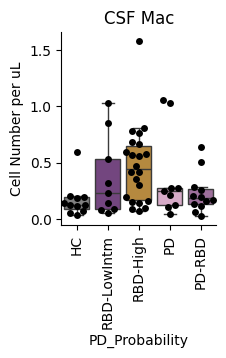

In [43]:
celltype = 'CSF Mac'

df_plot = df_abs_tidy[df_abs_tidy['CellType'].str.contains(celltype)]
plt.figure(figsize=(2,2.5))
sns.swarmplot(data=df_plot, x='PD_Probability', y='CellNumber',order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'], size=5, color='black')
sns.boxplot(data=df_plot, x='PD_Probability', y='CellNumber',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'], 
    palette=["gray", "#793C89", "#C98E2B", "#DEA4CA", "#A567A1", "#595996"])
plt.xticks(rotation=90)
sns.despine()
plt.ylabel('Cell Number per uL')
plt.title(f'{celltype}')
# plt.savefig(f'../scanpy/250407_CSF_downstream/graph/CSFCellfreq.pdf', bbox_inches='tight')

pvals = []
for cat in ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']:
    pvals.append(mannwhitneyu(
    list(df_abs_tidy.loc[(df_abs_tidy['CellType'] == celltype) & (df_abs_tidy['PD_Probability'] == 'HC'), 'CellNumber'].dropna().values), 
    list(df_abs_tidy.loc[(df_abs_tidy['CellType'] == celltype) & (df_abs_tidy['PD_Probability'] == cat), 'CellNumber'].dropna().values)
    ).pvalue)

df_pvals = pd.DataFrame({'pvals': pvals, 'cat': ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']})
df_pvals['pvals_adj'] = multi.multipletests(df_pvals['pvals'], method='fdr_bh')[1]
df_pvals

In [44]:
df_pvals

,pvals,cat,pvals_adj
0,0.254451,RBD-LowIntm,0.254872
1,0.005627,RBD-High,0.022510
2,0.110612,PD,0.221224
3,0.254872,PD-RBD,0.254872


In [45]:
df_abs_tidy['CellType'].unique()

array(['B naive', 'B memory', 'ASC', 'CD4 Tnaive', 'CD4 Tcm', 'CD4 Tem',
       'Treg', 'CD8 Tem_emra', 'Cycling T', 'NK CD16', 'NK CD56',
       'CD14 Mono', 'CD16 Mono', 'CSF Mac', 'migDC', 'pDC', 'cDC1',
       'cDC2', 'Cycling Myeloid', 'Fibroblast'], dtype=object)

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_3406747/1762839478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

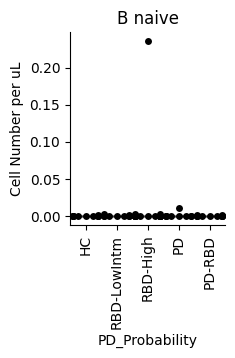

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


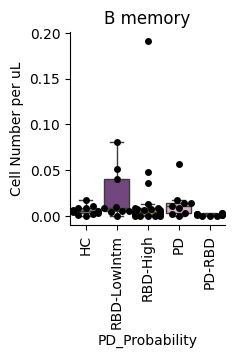

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


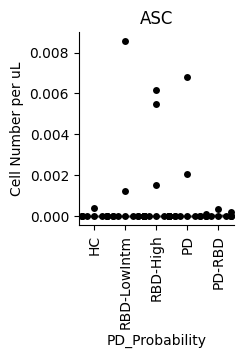

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


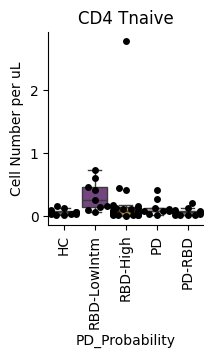

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


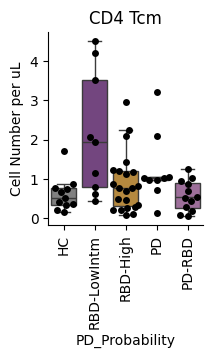

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


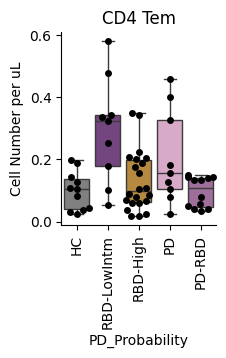

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


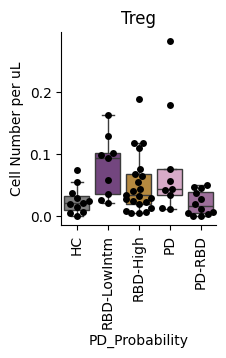

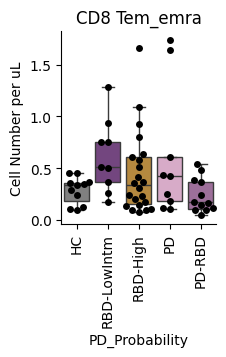

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


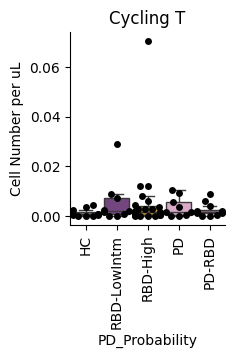

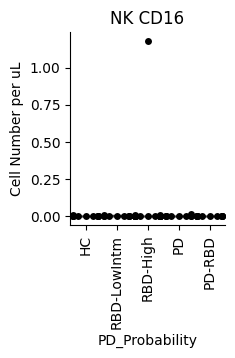

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


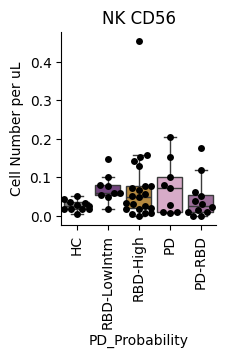

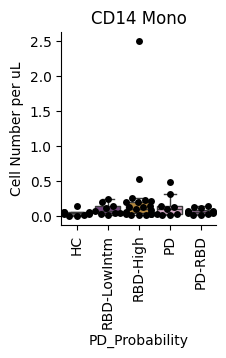

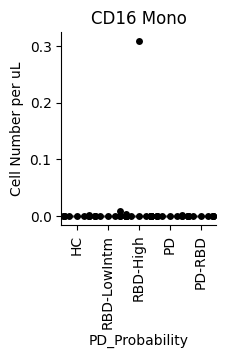

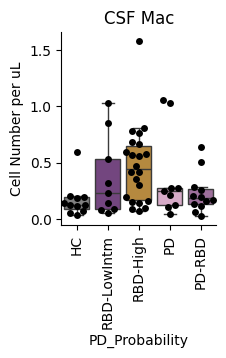

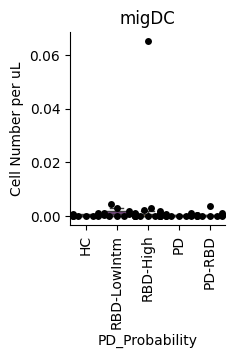

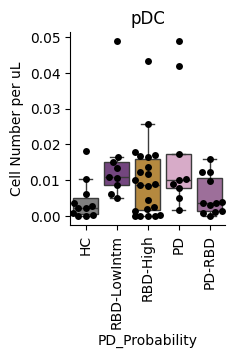

/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


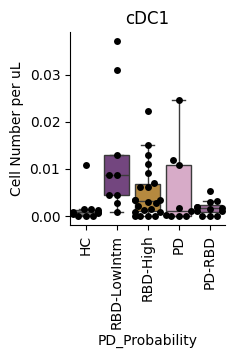

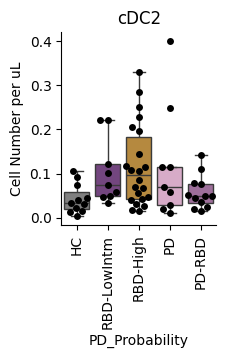

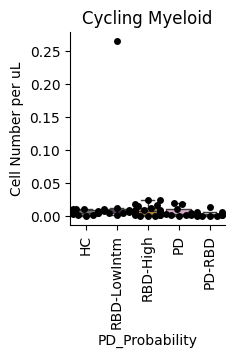

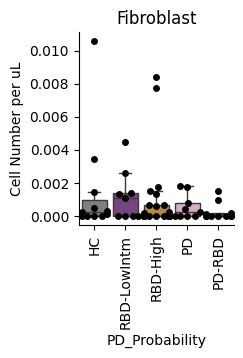

In [46]:
list_df_pvals = []
for celltype in df_abs_tidy['CellType'].unique():
    df_plot = df_abs_tidy[df_abs_tidy['CellType'].str.contains(celltype)]
    plt.figure(figsize=(2,2.5))
    sns.swarmplot(data=df_plot, x='PD_Probability', y='CellNumber',order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'], size=5, color='black')
    sns.boxplot(data=df_plot, x='PD_Probability', y='CellNumber',showfliers=False, order=['HC', 'RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD'], 
        palette=["gray", "#793C89", "#C98E2B", "#DEA4CA", "#A567A1", "#595996"])
    plt.xticks(rotation=90)
    sns.despine()
    plt.ylabel('Cell Number per uL')
    plt.title(f'{celltype}')
    plt.savefig(f'../scanpy/250407_CSF_downstream/graph/CSF.absolutecellnum.PDProb.{celltype}.pdf', bbox_inches='tight')
 
    pvals = []
    for cat in ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']:
        pvals.append(mannwhitneyu(
        list(df_abs_tidy.loc[(df_abs_tidy['CellType'] == celltype) & (df_abs_tidy['PD_Probability'] == 'HC'), 'CellNumber'].dropna().values), 
        list(df_abs_tidy.loc[(df_abs_tidy['CellType'] == celltype) & (df_abs_tidy['PD_Probability'] == cat), 'CellNumber'].dropna().values)
        ).pvalue)

    df_pvals = pd.DataFrame({'pvals': pvals, 'cat': ['RBD-LowIntm', 'RBD-High', 'PD', 'PD-RBD']})
    df_pvals['CellType'] = celltype

    list_df_pvals.append(df_pvals)
    # plt.close()
df_pvals_all = pd.concat(list_df_pvals, axis=0)
df_pvals_all['pvals_adj'] = multi.multipletests(df_pvals_all['pvals'], method='fdr_bh')[1]

In [47]:
df_pvals_all.sort_values(by='pvals_adj', ascending=True).head(20)

,pvals,cat,CellType,pvals_adj
0,0.003047,RBD-LowIntm,CD4 Tnaive,0.068600
0,0.003003,RBD-LowIntm,cDC1,0.068600
0,0.001418,RBD-LowIntm,NK CD56,0.068600
3,0.003430,PD-RBD,B memory,0.068600
0,0.009792,RBD-LowIntm,CD4 Tem,0.078332
0,0.006218,RBD-LowIntm,pDC,0.078332
0,0.007835,RBD-LowIntm,Treg,0.078332
1,0.008897,RBD-High,cDC2,0.078332
1,0.005627,RBD-High,CSF Mac,0.078332
0,0.007835,RBD-LowIntm,CD4 Tcm,0.078332


In [48]:
df_pvals_all.sort_values(by='pvals_adj', ascending=True).to_csv('../scanpy/250407_CSF_downstream/graph/CSF_celltype_pvals.csv', index=False)

# FCM CD16 Mono ITGA4

In [7]:
df = pd.read_excel('/home/yy693/pi_hafler/ASAP/data/ITGA4 CD16.xlsx', index_col=0, skiprows=2).reset_index(drop=True)

In [8]:
df

,HC,RBD-High,RBD-LowIntm,PD,PD-RBD
0,114506.0,143982,159021.0,77733.0,177858.0
1,76320.0,129583,111368.0,122942.0,137439.0
2,130792.0,167650,153203.0,126413.0,142207.0
3,130388.0,140454,147600.0,134073.0,158036.0
4,132013.0,137865,187526.0,133245.0,125245.0
5,108988.0,134073,126805.0,135745.0,96352.0
6,119199.0,99363,151312.0,106660.0,127592.0
7,154157.0,120309,118099.0,148981.0,121807.0
8,102471.0,152254,167650.0,117009.0,137865.0
9,104062.0,141766,114153.0,118464.0,126805.0


/tmp/ipykernel_907288/918041468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tidy, x="Category", y="Value", showfliers=False,
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/gpfs/gibbs/project/hafler/yy693/conda_envs/scanpy1.10.2/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


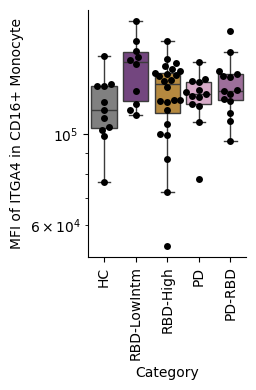

In [21]:
df_tidy = df.melt(var_name="Category", value_name="Value")

plt.figure(figsize=(2.7, 4))
sns.swarmplot(data=df_tidy, x="Category", y="Value", color="black", size=5,
                order=["HC", "RBD-LowIntm", "RBD-High", "PD", "PD-RBD"])
sns.boxplot(data=df_tidy, x="Category", y="Value", showfliers=False, 
            palette=["gray", "#793C89", "#C98E2B", "#DEA4CA", "#A567A1"],
            order=["HC", "RBD-LowIntm", "RBD-High", "PD", "PD-RBD"])

plt.xticks(rotation=90)
sns.despine()
plt.ylabel("MFI of ITGA4 in CD16+ Monocyte")
# plt.title("Boxplot + Swarmplot")
plt.tight_layout()
plt.yscale('log')

plt.savefig(f'../scanpy/250407_CSF_downstream/graph/ITGA4CD16mono.pdf', bbox_inches="tight")
plt.show()